## Basic classification  fashion mnist

In [1]:
from __future__ import absolute_import,division,print_function
#在旧版本中可以使用新版本的模块

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#导入数据集 fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
#1,2,3...标签命名
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

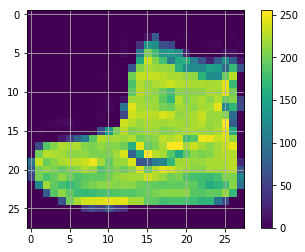

In [5]:
#显示图像
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show()

In [6]:
#scale
train_images,test_images = train_images/255.0,test_images/255.0

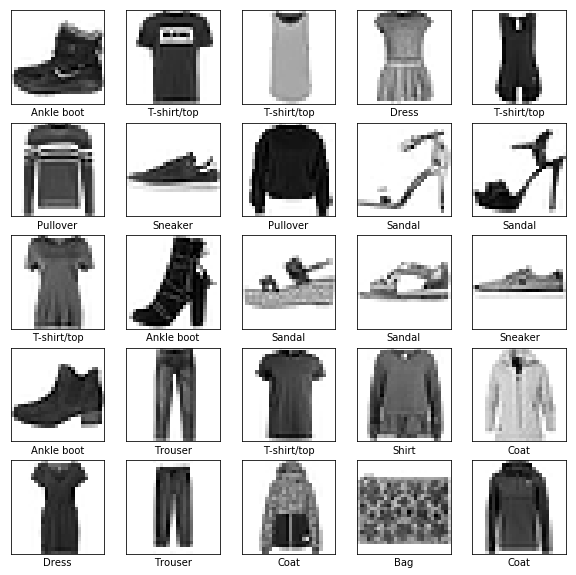

In [20]:
#显示25张图像
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i]])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
plt.show()

In [9]:
#建立模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
#编译模型
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4959 - acc: 0.8251
Epoch 2/4
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3723 - acc: 0.8652
Epoch 3/4
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3358 - acc: 0.8785
Epoch 4/4
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3118 - acc: 0.8859


In [12]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3498 - acc: 0.8733


In [13]:
print('accuracy',test_acc)

accuracy 0.8733


In [14]:
predictions = model.predict(test_images)
predictions[1]
np.argmax(predictions[1])

2

In [15]:
np.argmax(predictions[1])

2

In [16]:
test_labels[1]

2

In [17]:
# 单一图片预测
img = (np.expand_dims(test_images[1],0))
np.argmax(model.predict(img))

2

# Text classification  Imdb

In [61]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [62]:
print("train data total:{}, label label total:{}".format(len(train_data),len(train_labels)))

train data total:25000, label label total:25000


In [63]:
len(test_data)

25000

In [64]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


每个数字在字典里对应一个单词，train_data[0]是一段话

In [65]:
len(train_data[0])

218

In [66]:
#查看对应字典
word_index = imdb.get_word_index()
word_index


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [67]:
#将index 后移3位
word_index = {k:(v+3) for k,v in word_index.items()}
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [68]:
#文字规定
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  
word_index["<UNUSED>"] = 3

#字典键 值 转成 值 键
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

reverse_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [69]:
#获取每个单词，将 空格+单词一一加入
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [70]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [72]:
#将单词(数字表示）转换成标准长度的向量
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [73]:
train_data[0].shape 

(256,)

In [74]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))#将每个单词用16维的向量表示
model.add(keras.layers.GlobalAveragePooling1D())  #？？？
model.add(keras.layers.Dense(16,activation = tf.nn.relu))
model.add(keras.layers.Dense(1,activation = tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [117]:
from tensorflow.keras.metrics import categorical_accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [108]:
#划分训练数据，确定模型性能
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [118]:
#训练模型
history = model.fit(partial_x_train,partial_y_train,epochs=40,batch_size=512,
          validation_data=(x_val,y_val),verbose=1)#verbose 显示进度条

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 95us/sample - loss: 0.0016 - acc: 0.9999 - val_loss: 0.8720 - val_acc: 0.8585
Epoch 2/40
15000/15000 [==============================] - 1s 66us/sample - loss: 0.0014 - acc: 0.9999 - val_loss: 0.8860 - val_acc: 0.8584
Epoch 3/40
15000/15000 [==============================] - 1s 69us/sample - loss: 0.0012 - acc: 0.9999 - val_loss: 0.8993 - val_acc: 0.8575
Epoch 4/40
15000/15000 [==============================] - 1s 79us/sample - loss: 0.0011 - acc: 0.9999 - val_loss: 0.9124 - val_acc: 0.8582
Epoch 5/40
15000/15000 [==============================] - 1s 74us/sample - loss: 0.0010 - acc: 0.9999 - val_loss: 0.9262 - val_acc: 0.8583
Epoch 6/40
15000/15000 [==============================] - 1s 84us/sample - loss: 9.0303e-04 - acc: 1.0000 - val_loss: 0.9388 - val_acc: 0.8586
Epoch 7/40
15000/15000 [==============================] - 1s 84us/sample - loss: 7.9698e-04 - acc: 0.9999 - val_

In [110]:
model.evaluate(test_data,test_labels)

25000/25000 [==============================] - 1s 51us/sample - loss: 0.6746 - acc: 0.8523


[0.6746212269067764, 0.85228]

In [119]:
# 模型评估
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

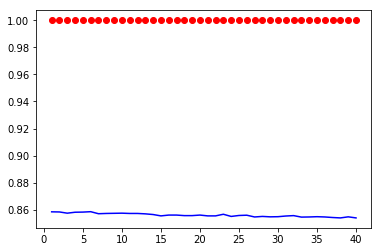

In [122]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'ob',color = 'r')
plt.plot(epochs,val_acc,'b',color = 'b')
plt.show()

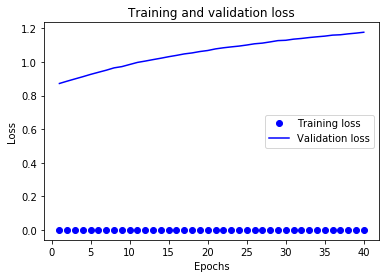

In [123]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## regression automobiles

In [127]:
import seaborn as sns
import pathlib
import pandas as pd
from tensorflow.keras import layers

In [242]:
#下载数据集
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\My\\.keras\\datasets\\auto-mpg.data'

In [269]:
#读取为dataframe
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [244]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [270]:
dataset = dataset.dropna()

In [271]:
origin = dataset.pop('Origin')

#将Origin onehot编码
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3) * 1.0

In [272]:
#划分数据集
from sklearn.model_selection import train_test_split
train_dataset = dataset.sample(frac=.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


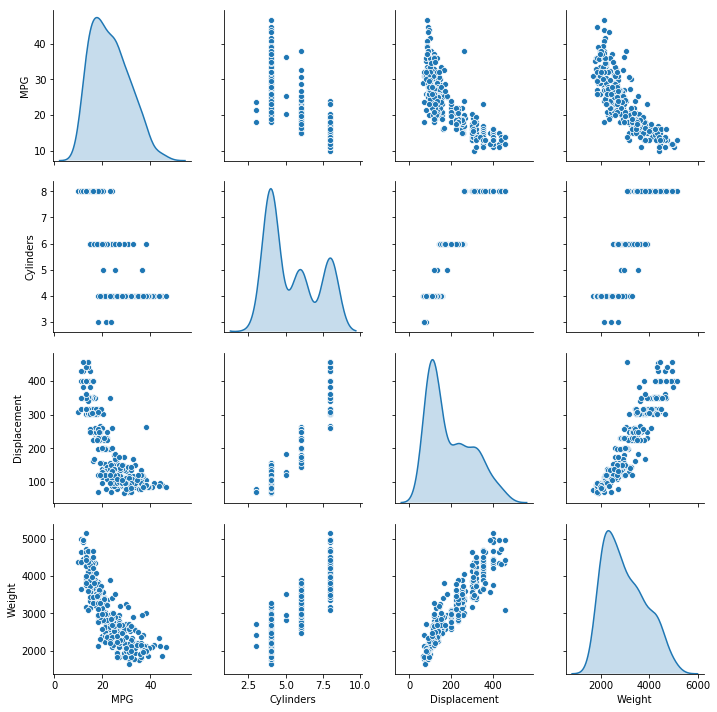

In [273]:
sns.pairplot(train_dataset,vars=["MPG", "Cylinders", "Displacement", "Weight"], diag_kind="kde")

In [274]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [275]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [276]:
train_stats = train_dataset.describe()

train_stats = train_stats.transpose()

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [281]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [282]:
model = build_model()

In [283]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [284]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.05605657],
       [-0.0278619 ],
       [ 0.05805571],
       [-0.09743108],
       [-0.23713596],
       [ 0.08880529],
       [-0.22744712],
       [-0.16759476],
       [-0.00200424],
       [-0.04297359]], dtype=float32)

In [209]:
len(train_dataset.columns)

9

In [285]:
#每训练100个数据输出一个 .
class PrintDot(keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [286]:
EPOCHS = 1000
#训练模型，20%做validation
history = model.fit(
    normed_train_data,train_labels,
    epochs = EPOCHS,validation_split=0.2,verbose = 0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [287]:
#将模型在训练集和验证集的表现存入DF
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.762124,1.041108,2.762124,8.447099,2.340467,8.447099,995
996,2.719249,1.030725,2.719249,8.783745,2.271573,8.783745,996
997,2.576159,1.037260,2.576159,8.788167,2.317374,8.788167,997
998,2.824609,1.097405,2.824609,8.620863,2.307611,8.620863,998
999,2.609255,1.016549,2.609255,8.556741,2.292591,8.556741,999


(0, 5)

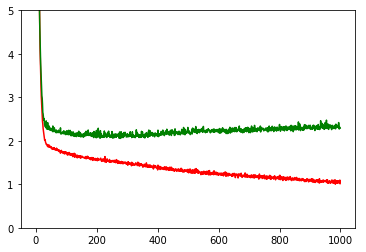

In [293]:
plt.figure()
plt.plot(hist['epoch'],hist['mean_absolute_error'],color = 'r')
plt.plot(hist['epoch'],hist['val_mean_absolute_error'],color = 'g')
plt.ylim([0,5])

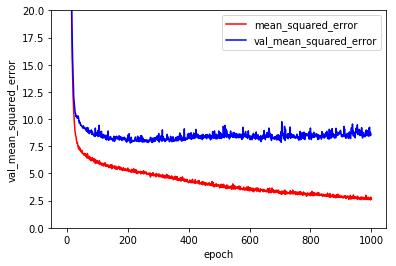

In [298]:
plt.figure()
plt.plot(hist['epoch'],hist['mean_squared_error'],color = 'r')
plt.plot(hist['epoch'],hist['val_mean_squared_error'],color = 'b')
plt.xlabel('epoch')
plt.ylabel('val_mean_squared_error')
plt.ylim([0,20])
plt.legend()

In [301]:
#early_stop
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(normed_train_data ,train_labels,epochs = EPOCHS,validation_split = .2,
                   verbose = 0,callbacks = [early_stop,PrintDot()])


...................................................................

In [303]:
loss,mean,mse = model.evaluate(normed_test_data,test_labels,verbose=0)
print('loss {},mean {} , mse {}'.format(loss,mean,mse))

loss 5.3399726549784345,mean 1.8004461526870728 , mse 5.339972972869873


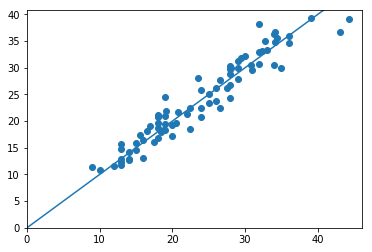

In [309]:
test_pred = model.predict(normed_test_data).flatten()
plt.scatter(test_labels,test_pred)

plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])

## Overfitting and underfitting

In [311]:
NUM_WORDS =10000

(train_data,train_labels),(test_data,test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)


In [313]:
train_data.shape,train_labels.shape

((25000,), (25000,))

In [316]:
def multi_hot_sequences(sequences,dimension):
    #建立一个（sequences,dimension）矩阵
    results = np.zeros((len(sequences),dimension))
    
    for i,j in enumerate(sequences):
        results[i,j] = 1.0
    return results

In [317]:
train_data = multi_hot_sequences(train_data,NUM_WORDS)
train_data.shape

(25000, 10000)

In [319]:
test_data = multi_hot_sequences(test_data,NUM_WORDS)

IndexError: arrays used as indices must be of integer (or boolean) type

In [320]:
test_data.shape

(25000, 10000)

In [321]:
#建立一个基本模型
baseline_model = keras.Sequential([
    layers.Dense(16,activation = tf.nn.relu,input_shape = (NUM_WORDS,)),
    layers.Dense(16,activation= tf.nn.relu),
    layers.Dense(1,activation = tf.sigmoid)
    
])

In [322]:
baseline_model.compile(loss = 'binary_crossentropy',optimizer='adam',
                       metrics=['accuracy','crossentropy']
                      )

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_50 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [323]:
baseline_history = baseline_model.fit(train_data,train_labels,epochs=20,batch_size=512,
                                     validation_data=(test_data,test_labels),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 36s - loss: 0.4424 - acc: 0.8188 - ce: 0.4424 - val_loss: 0.3073 - val_acc: 0.8810 - val_ce: 0.3073
Epoch 2/20
 - 22s - loss: 0.2271 - acc: 0.9175 - ce: 0.2271 - val_loss: 0.2838 - val_acc: 0.8870 - val_ce: 0.2838
Epoch 3/20
 - 10s - loss: 0.1693 - acc: 0.9407 - ce: 0.1693 - val_loss: 0.3014 - val_acc: 0.8794 - val_ce: 0.3014
Epoch 4/20
 - 7s - loss: 0.1379 - acc: 0.9534 - ce: 0.1379 - val_loss: 0.3493 - val_acc: 0.8677 - val_ce: 0.3493
Epoch 5/20
 - 6s - loss: 0.1120 - acc: 0.9630 - ce: 0.1120 - val_loss: 0.3538 - val_acc: 0.8707 - val_ce: 0.3538
Epoch 6/20
 - 6s - loss: 0.0896 - acc: 0.9730 - ce: 0.0896 - val_loss: 0.3856 - val_acc: 0.8686 - val_ce: 0.3856
Epoch 7/20
 - 6s - loss: 0.0714 - acc: 0.9798 - ce: 0.0714 - val_loss: 0.4248 - val_acc: 0.8649 - val_ce: 0.4248
Epoch 8/20
 - 6s - loss: 0.0579 - acc: 0.9857 - ce: 0.0579 - val_loss: 0.4653 - val_acc: 0.8619 - val_ce: 0.4653
Epoch 9/20
 - 6s - loss: 0.0443 - acc: 0.99

In [324]:
#smaller model
smaller_model = keras.Sequential([
    layers.Dense(4,activation = tf.nn.relu,input_shape = (NUM_WORDS,)),
    layers.Dense(4,activation = tf.nn.relu),
    layers.Dense(1,activation = tf.nn.sigmoid)
]) 


In [325]:
smaller_model.compile(loss = 'binary_crossentropy',optimizer='adam',
                     metrics=['accuracy','binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [326]:
smaller_history = smaller_model.fit(train_data,train_labels,epochs = 20,batch_size=512,
                                   validation_data=(test_data,test_labels),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 22s - loss: 0.6480 - acc: 0.6394 - binary_crossentropy: 0.6480 - val_loss: 0.6043 - val_acc: 0.6928 - val_binary_crossentropy: 0.6043
Epoch 2/20
 - 10s - loss: 0.5593 - acc: 0.7724 - binary_crossentropy: 0.5593 - val_loss: 0.5410 - val_acc: 0.7718 - val_binary_crossentropy: 0.5410
Epoch 3/20
 - 6s - loss: 0.4966 - acc: 0.8413 - binary_crossentropy: 0.4966 - val_loss: 0.4968 - val_acc: 0.8139 - val_binary_crossentropy: 0.4968
Epoch 4/20
 - 6s - loss: 0.4496 - acc: 0.8802 - binary_crossentropy: 0.4496 - val_loss: 0.4656 - val_acc: 0.8464 - val_binary_crossentropy: 0.4656
Epoch 5/20
 - 6s - loss: 0.4144 - acc: 0.9043 - binary_crossentropy: 0.4144 - val_loss: 0.4482 - val_acc: 0.8526 - val_binary_crossentropy: 0.4482
Epoch 6/20
 - 7s - loss: 0.3868 - acc: 0.9198 - binary_crossentropy: 0.3868 - val_loss: 0.4320 - val_acc: 0.8664 - val_binary_crossentropy: 0.4320
Epoch 7/20
 - 7s - loss: 0.3631 - acc: 0.9312 - binary_crossentrop

In [327]:
bigger_model = tf.keras.models.Sequential([
    layers.Dense(512,activation = tf.nn.relu,input_shape = (NUM_WORDS,)),
    layers.Dense(512,activation = tf.nn.relu),
    layers.Dense(1,activation = tf.nn.sigmoid)
])

In [328]:
bigger_model.compile(loss = 'binary_crossentropy',optimizer = 'adam',
                     metrics = ['accuracy','binary_crossentropy'] )
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_56 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [329]:
bigger_history = bigger_model.fit(train_data,train_labels,epochs=20,batch_size=512,
                                 validation_data=(test_data,test_labels),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 56s - loss: 0.3532 - acc: 0.8488 - binary_crossentropy: 0.3532 - val_loss: 0.3084 - val_acc: 0.8733 - val_binary_crossentropy: 0.3084
Epoch 2/20
 - 36s - loss: 0.1507 - acc: 0.9448 - binary_crossentropy: 0.1507 - val_loss: 0.3281 - val_acc: 0.8739 - val_binary_crossentropy: 0.3281
Epoch 3/20
 - 30s - loss: 0.0534 - acc: 0.9843 - binary_crossentropy: 0.0534 - val_loss: 0.4339 - val_acc: 0.8690 - val_binary_crossentropy: 0.4339
Epoch 4/20
 - 30s - loss: 0.0086 - acc: 0.9986 - binary_crossentropy: 0.0086 - val_loss: 0.5583 - val_acc: 0.8676 - val_binary_crossentropy: 0.5583
Epoch 5/20
 - 31s - loss: 0.0012 - acc: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 0.6582 - val_acc: 0.8673 - val_binary_crossentropy: 0.6582
Epoch 6/20
 - 27s - loss: 7.8292e-04 - acc: 1.0000 - binary_crossentropy: 7.8292e-04 - val_loss: 0.6989 - val_acc: 0.8692 - val_binary_crossentropy: 0.6989
Epoch 7/20
 - 27s - loss: 3.0839e-04 - acc: 1.0000 - b

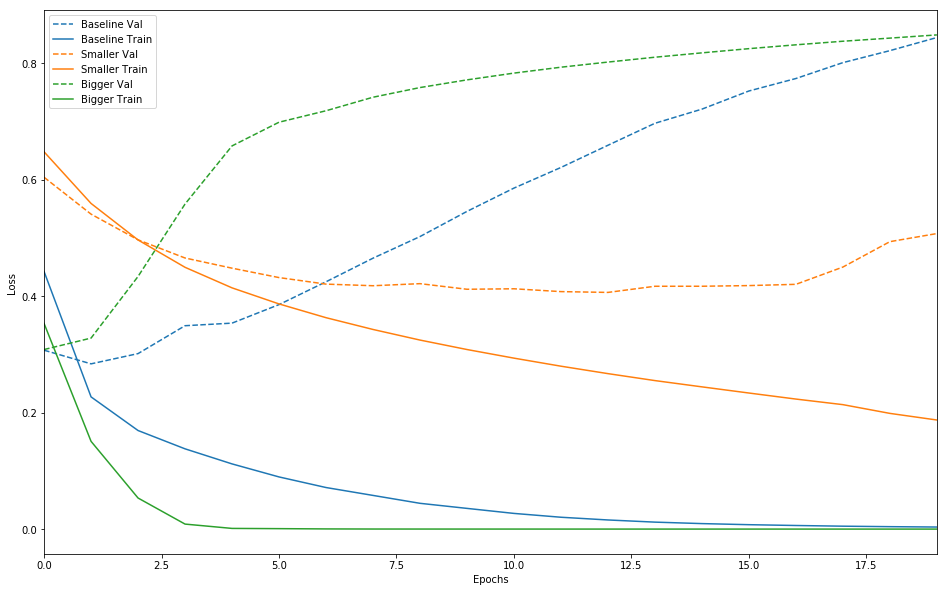

In [343]:
def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

smaller_model:在训练集和验证集上的loss都很大
bigger_model：在测试集的loss小 但容易overfitting

In [346]:
#NN regulation
l2_model = tf.keras.Sequential([
    layers.Dense(16,activation = tf.nn.relu,kernel_regularizer = keras.regularizers.l2(0.001)
                 ,input_shape =(NUM_WORDS,)),
    layers.Dense(16,activation=tf.nn.relu,kernel_regularizer= keras.regularizers.l2(0.001)),
    layers.Dense(1,activation = tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 40s - loss: 0.4985 - acc: 0.8192 - binary_crossentropy: 0.4549 - val_loss: 0.3708 - val_acc: 0.8794 - val_binary_crossentropy: 0.3261
Epoch 2/20
 - 25s - loss: 0.2973 - acc: 0.9123 - binary_crossentropy: 0.2496 - val_loss: 0.3357 - val_acc: 0.8874 - val_binary_crossentropy: 0.2856
Epoch 3/20
 - 7s - loss: 0.2487 - acc: 0.9310 - binary_crossentropy: 0.1965 - val_loss: 0.3380 - val_acc: 0.8856 - val_binary_crossentropy: 0.2845
Epoch 4/20
 - 7s - loss: 0.2269 - acc: 0.9409 - binary_crossentropy: 0.1717 - val_loss: 0.3549 - val_acc: 0.8799 - val_binary_crossentropy: 0.2986
Epoch 5/20
 - 6s - loss: 0.2115 - acc: 0.9480 - binary_crossentropy: 0.1542 - val_loss: 0.3661 - val_acc: 0.8782 - val_binary_crossentropy: 0.3080
Epoch 6/20
 - 7s - loss: 0.2000 - acc: 0.9533 - binary_crossentropy: 0.1409 - val_loss: 0.3784 - val_acc: 0.8758 - val_binary_crossentropy: 0.3188
Epoch 7/20
 - 6s - loss: 0.1929 - acc: 0.9559 - binary_crossentrop

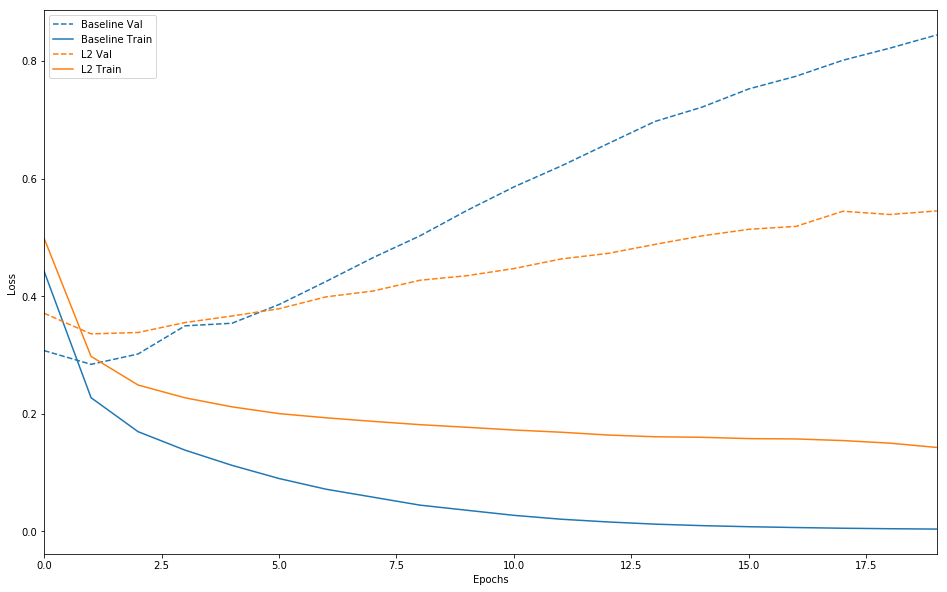

In [347]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

正则化后validation loss 降低了

In [361]:
#drop out
dpt_model = keras.models.Sequential([
    layers.Dense(16,activation = tf.nn.relu,input_shape = (NUM_WORDS,)),
    layers.Dropout(0.3),
    layers.Dense(16,activation = tf.nn.relu),
    layers.Dropout(0.3),
    layers.Dense(1,activation = tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.5771 - acc: 0.7057 - binary_crossentropy: 0.5771 - val_loss: 0.4097 - val_acc: 0.8678 - val_binary_crossentropy: 0.4097
Epoch 2/20
 - 8s - loss: 0.3732 - acc: 0.8529 - binary_crossentropy: 0.3732 - val_loss: 0.3094 - val_acc: 0.8857 - val_binary_crossentropy: 0.3094
Epoch 3/20
 - 7s - loss: 0.2763 - acc: 0.9041 - binary_crossentropy: 0.2763 - val_loss: 0.2799 - val_acc: 0.8871 - val_binary_crossentropy: 0.2799
Epoch 4/20
 - 6s - loss: 0.2157 - acc: 0.9288 - binary_crossentropy: 0.2157 - val_loss: 0.2800 - val_acc: 0.8866 - val_binary_crossentropy: 0.2800
Epoch 5/20
 - 8s - loss: 0.1705 - acc: 0.9441 - binary_crossentropy: 0.1705 - val_loss: 0.2974 - val_acc: 0.8840 - val_binary_crossentropy: 0.2974
Epoch 6/20
 - 7s - loss: 0.1389 - acc: 0.9568 - binary_crossentropy: 0.1389 - val_loss: 0.3174 - val_acc: 0.8808 - val_binary_crossentropy: 0.3174
Epoch 7/20
 - 7s - loss: 0.1170 - acc: 0.9632 - binary_crossentropy

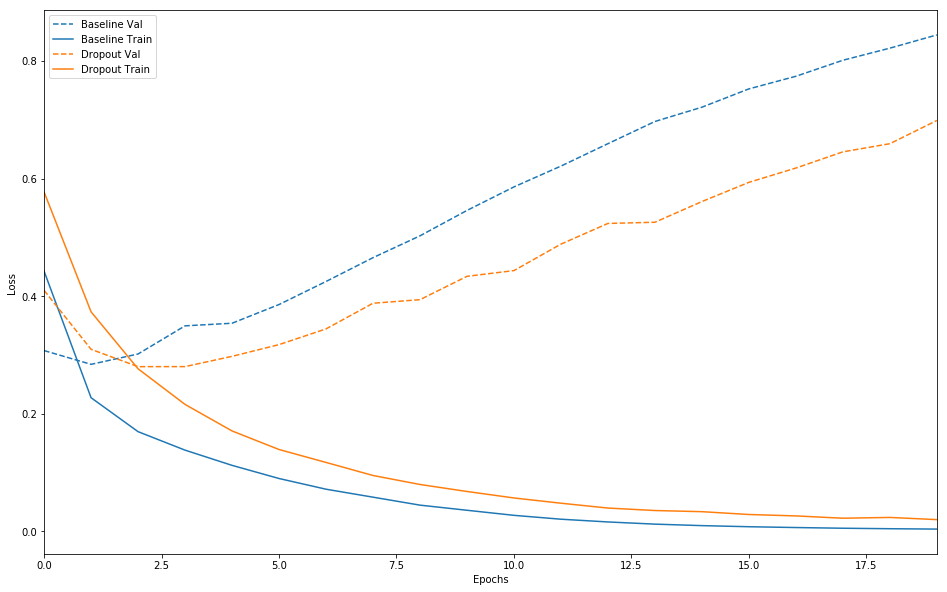

In [362]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

dropout后validation loss 变小

## Save and restore models

In [381]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

In [384]:
def create_model():
    model = tf.keras.Sequential([
        layers.Dense(512,activation = tf.nn.relu,input_shape = (784,)),
        layers.Dropout(0.2),
        layers.Dense(10,activation = tf.nn.softmax)
    ])
    
    model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,optimizer = 'adam',
                 metrics = ['accuracy'])
    return model

In [385]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [386]:
#保存模型，建立端点，训练一次保存一次
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10, 
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  


Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 992/1000 [============================>.] - ETA: 0s - loss: 1.1328 - acc: 0.7016
Epoch 00001: saving model to training_1/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.1278 - acc: 0.7030 - val_loss: 0.6876 - val_acc: 0.7930
Epoch 2/10
 992/1000 [============================>.] - ETA: 0s - loss: 0.4165 - acc: 0.8821
Epoch 00002: saving model to training_1/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 1s 627us/sample - loss: 0.4147 - acc: 0.8820 - val_loss: 0.5369 - val_acc: 0.8270
Epoch 3/10
 992/1000 [============================>.] - ETA: 0s - loss: 0.2756 - acc: 0.9294
Epoch 00003: saving model to training_1/cp.ckpt

Consider using a TensorFlow optim

In [388]:
model = create_model()
model.evaluate(test_images,test_labels)

1000/1000 [==============================] - 0s 401us/sample - loss: 2.2791 - acc: 0.1490


[2.2790925025939943, 0.149]

In [390]:
#导入训练好的weight
model.load_weights(checkpoint_path)
model.evaluate(test_images,test_labels)

1000/1000 [==============================] - 0s 134us/sample - loss: 0.4121 - acc: 0.8680


[0.41206076288223265, 0.868]

In [391]:
#训练好的模型 直接存weight
model.save_weights('my_checkpoint')

model = create_model()
model.load_weights('my_checkpoint')
model.evaluate(test_images,test_labels)


Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 1s 570us/sample - loss: 0.4121 - acc: 0.8680


[0.41206076288223265, 0.868]

In [393]:
#保存整个模型
model = create_model()
model.fit(train_images,train_labels,epochs = 5)

model.save('my_model.h5')

new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Epoch 1/5
1000/1000 [==============================] - 1s 859us/sample - loss: 1.1741 - acc: 0.6770
Epoch 2/5
1000/1000 [==============================] - 0s 454us/sample - loss: 0.4092 - acc: 0.8940
Epoch 3/5
1000/1000 [==============================] - 0s 423us/sample - loss: 0.2720 - acc: 0.9330
Epoch 4/5
1000/1000 [==============================] - 0s 451us/sample - loss: 0.2106 - acc: 0.9540
Epoch 5/5
1000/1000 [==============================] - 0s 457us/sample - loss: 0.1424 - acc: 0.9690
